--- Skrip Plot Semivariogram Eksperimental Dimulai ---
✓ File data/kejadian.csv ditemukan.

Langkah 1: Memuat data dari CSV...

Langkah 2: Mempersiapkan data (lons, lats, values)...
✓ 29 titik data siap untuk diproses.

Langkah 3: Menghitung semivariogram...
Langkah 4: Mengambil data hasil perhitungan (lags dan semivariance)...

Langkah 5: Membuat plot dan menyimpannya sebagai 'semivariogram_eksperimental.png'...

--- Selesai ---
✓ Plot telah berhasil dibuat dan disimpan sebagai: semivariogram_eksperimental.png


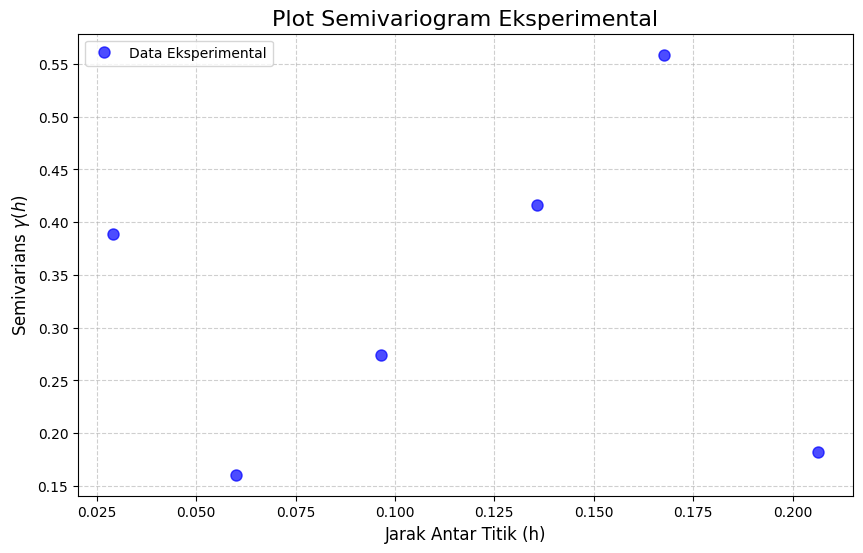

In [1]:
import pandas as pd
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
import os

KEJADIAN_FILE = 'data/kejadian.csv' 
OUTPUT_PLOT_FILE = 'semivariogram_eksperimental.png'


print(f"--- Skrip Plot Semivariogram Eksperimental Dimulai ---")


if not os.path.exists(KEJADIAN_FILE):
    print(f"❌ ERROR: File {KEJADIAN_FILE} tidak ditemukan.")
    print("Pastikan file 'kejadian.csv' ada di direktori yang sama dengan skrip ini.")
else:
    print(f"✓ File {KEJADIAN_FILE} ditemukan.")
    
    try:
        print("\nLangkah 1: Memuat data dari CSV...")
        df_crime = pd.read_csv(KEJADIAN_FILE)
        print("\nLangkah 2: Mempersiapkan data (lons, lats, values)...")
        lons = df_crime['longitude'].values
        lats = df_crime['latitude'].values
        values = df_crime['jumlah_kejadian'].values
        print(f"✓ {len(values)} titik data siap untuk diproses.")
        print("\nLangkah 3: Menghitung semivariogram...")
        OK = OrdinaryKriging(
            lons, lats, values,
            variogram_model="spherical", # Sesuai skripsi Anda
            verbose=False,       
            enable_plotting=False 
        )

        print("Langkah 4: Mengambil data hasil perhitungan (lags dan semivariance)...")
        lags = OK.lags
        semivariance = OK.semivariance
        print(f"\nLangkah 5: Membuat plot dan menyimpannya sebagai '{OUTPUT_PLOT_FILE}'...")
        
        plt.figure(figsize=(10, 6))
        plt.plot(lags, semivariance, 'bo', markersize=8, alpha=0.7, label='Data Eksperimental')
        
        plt.title('Plot Semivariogram Eksperimental', fontsize=16)
        plt.xlabel('Jarak Antar Titik (h)', fontsize=12)
        plt.ylabel('Semivarians $\gamma(h)$', fontsize=12) 
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        
        plt.savefig(OUTPUT_PLOT_FILE)
        
        print(f"\n--- Selesai ---")
        print(f"✓ Plot telah berhasil dibuat dan disimpan sebagai: {OUTPUT_PLOT_FILE}")

    except Exception as e:
        print(f"❌ Terjadi error: {e}")